#                           Support Vector Machine

# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [3]:
from sklearn.metrics import accuracy_score

# Loading The Dataset

In [4]:
data=pd.read_csv('spam (1).csv')

In [41]:
data.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
data.tail()

,Label,EmailText
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Statistical Summary

In [44]:
data.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [45]:
data.isnull()

,Label,EmailText
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


Checking Missing Values

In [46]:
data.isnull().sum()

Label        0
EmailText    0
dtype: int64

In [47]:
X = data['EmailText'].values
y = data['Label'].values

In [48]:
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [49]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

# Split The Dataset

Split arrays or matrices into random train and test subsets

sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None,random_state=None,shuffle=True,stratify=None)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

sklearn.feature_extraction.text.CountVectorizer

class sklearn.feature_extraction.text.CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)

In [51]:
cv = CountVectorizer()  
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [52]:
print(X_train)

  (0, 4711)	2
  (0, 6732)	1
  (0, 3689)	2
  (0, 3827)	1
  (0, 3422)	2
  (0, 3203)	1
  (0, 906)	1
  (0, 6881)	1
  (0, 2465)	1
  (1, 898)	1
  (1, 3582)	2
  (1, 2605)	1
  (1, 6698)	1
  (1, 4761)	1
  (1, 3123)	1
  (1, 6814)	1
  (1, 7269)	1
  (1, 3839)	1
  (1, 2775)	1
  (1, 4429)	1
  (2, 3689)	1
  (2, 7289)	1
  (2, 7233)	1
  (2, 2973)	1
  (2, 4587)	1
  :	:
  (4454, 5827)	1
  (4454, 3819)	1
  (4454, 2301)	1
  (4454, 4914)	1
  (4454, 7235)	1
  (4455, 7552)	1
  (4455, 7579)	1
  (4455, 3302)	1
  (4455, 4045)	1
  (4455, 2277)	1
  (4455, 4120)	1
  (4455, 5713)	1
  (4455, 4187)	1
  (4455, 6335)	1
  (4456, 6814)	2
  (4456, 7579)	3
  (4456, 3466)	1
  (4456, 6639)	1
  (4456, 814)	1
  (4456, 6581)	1
  (4456, 7457)	2
  (4456, 961)	1
  (4456, 3324)	1
  (4456, 2141)	1
  (4456, 6436)	1


In [53]:
print(X_test)

  (0, 842)	1
  (0, 1880)	1
  (0, 3815)	1
  (0, 3962)	1
  (0, 5152)	1
  (0, 6019)	1
  (0, 6814)	1
  (0, 6847)	1
  (0, 7063)	1
  (1, 2733)	1
  (1, 4870)	1
  (1, 6696)	1
  (1, 7261)	1
  (2, 890)	1
  (2, 924)	1
  (2, 983)	1
  (2, 1010)	1
  (2, 1956)	1
  (2, 1996)	1
  (2, 2350)	2
  (2, 2675)	1
  (2, 2775)	1
  (2, 2894)	1
  (2, 3242)	1
  (2, 3357)	1
  :	:
  (1114, 402)	1
  (1114, 890)	1
  (1114, 924)	1
  (1114, 1540)	1
  (1114, 1897)	1
  (1114, 3068)	1
  (1114, 3072)	1
  (1114, 3302)	1
  (1114, 3689)	2
  (1114, 3700)	1
  (1114, 3927)	1
  (1114, 4329)	1
  (1114, 4916)	1
  (1114, 5992)	1
  (1114, 6432)	1
  (1114, 6576)	2
  (1114, 6690)	1
  (1114, 6696)	2
  (1114, 6814)	3
  (1114, 7284)	1
  (1114, 7309)	1
  (1114, 7355)	1
  (1114, 7365)	2
  (1114, 7579)	1
  (1114, 7584)	1


# Specify The Model

sklearn.svm.SVC

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [ ]:
from sklearn.svm import SVC

kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

In [54]:
classifier = SVC(kernel = 'rbf', random_state = 10)
classifier.fit(X_train, y_train)
print(classifier.score(X_test,y_test))

0.9766816143497757


Text(0.5, 1.0, 'Confusion Matrix')

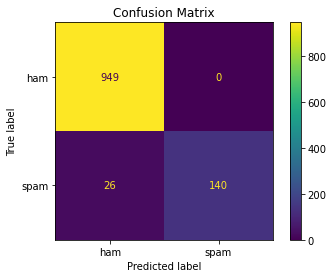

In [55]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,X_test,y_test)
plt.title('Confusion Matrix')

sklearn.model_selection.GridSearchCV

class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

Exhaustive search over specified parameter values for an estimator.

In [56]:
tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
                      'C': [1, 10, 100, 1000]}

model = GridSearchCV(svm.SVC(), tuned_parameters)
model.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [57]:
 print(model.score(X_test,y_test))

0.979372197309417


# Prediction Of Test Result

In [58]:
y_pred=model.predict(X_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

# Accuracy Score

sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

Accuracy classification score

In [59]:
accuracy=accuracy_score(y_test,y_pred)*100
accuracy

97.9372197309417

# Confusion Matrix

sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

Compute confusion matrix to evaluate the accuracy of a classification

In [60]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[946,   3],
       [ 20, 146]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

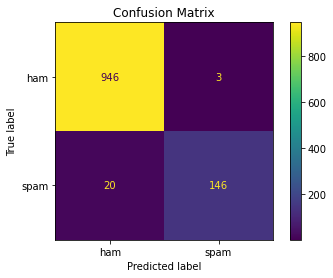

In [61]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Normalized Confusion Matrix')

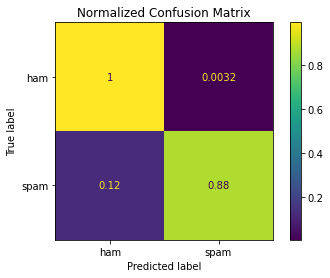

In [62]:
plot_confusion_matrix(model,X_test,y_test,normalize='true')
plt.title('Normalized Confusion Matrix')